In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
# Reading the file NBA_Shot_Locations

In [3]:
data = pd.read_csv(r'C:\Users\simot\Documents\GitHub\DataScientest\NBA_Shot_Locations_1997_2020.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4729512 entries, 0 to 4729511
Data columns (total 22 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   Game ID            int64 
 1   Game Event ID      int64 
 2   Player ID          int64 
 3   Player Name        object
 4   Team ID            int64 
 5   Team Name          object
 6   Period             int64 
 7   Minutes Remaining  int64 
 8   Seconds Remaining  int64 
 9   Action Type        object
 10  Shot Type          object
 11  Shot Zone Basic    object
 12  Shot Zone Area     object
 13  Shot Zone Range    object
 14  Shot Distance      int64 
 15  X Location         int64 
 16  Y Location         int64 
 17  Shot Made Flag     int64 
 18  Game Date          int64 
 19  Home Team          object
 20  Away Team          object
 21  Season Type        object
dtypes: int64(12), object(10)
memory usage: 793.8+ MB


In [5]:
# We place in a list the 20 players considered

In [6]:
PlayerList = ['Tim Duncan', 'Kobe Bryant', 'Allen Iverson', 'Steve Nash', 'Ray Allen', 'Paul Pierce', 'Pau Gasol', 'Tony Parker',
              'Manu Ginobili', 'Dwayne Wade', 'LeBron James', 'Chris Paul', 'Kevin Durant', 'Russell Westbrook', 'Stephen Curry', 
              'James Harden', 'Kawhi Leonard', 'Damian Lillard', 'Anthony Davis', 'Giannis Antetokounmpo']


In [7]:
# We restraint our data to the 20 players

In [8]:
data = data[ data['Player Name'].isin(PlayerList) ]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330190 entries, 17033 to 4727908
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Game ID            330190 non-null  int64 
 1   Game Event ID      330190 non-null  int64 
 2   Player ID          330190 non-null  int64 
 3   Player Name        330190 non-null  object
 4   Team ID            330190 non-null  int64 
 5   Team Name          330190 non-null  object
 6   Period             330190 non-null  int64 
 7   Minutes Remaining  330190 non-null  int64 
 8   Seconds Remaining  330190 non-null  int64 
 9   Action Type        330190 non-null  object
 10  Shot Type          330190 non-null  object
 11  Shot Zone Basic    330190 non-null  object
 12  Shot Zone Area     330190 non-null  object
 13  Shot Zone Range    330190 non-null  object
 14  Shot Distance      330190 non-null  int64 
 15  X Location         330190 non-null  int64 
 16  Y Location     

In [10]:
data.head(10)

,Game ID,Game Event ID,Player ID,Player Name,Team ID,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,...,Shot Zone Area,Shot Zone Range,Shot Distance,X Location,Y Location,Shot Made Flag,Game Date,Home Team,Away Team,Season Type
17033,29700010,31,1495,Tim Duncan,1610612759,San Antonio Spurs,1,8,47,Jump Shot,...,Right Side(R),16-24 ft.,16,154,53,0,19971031,DEN,SAS,Regular Season
17034,29700010,76,1495,Tim Duncan,1610612759,San Antonio Spurs,1,5,11,Layup Shot,...,Center(C),Less Than 8 ft.,0,0,0,1,19971031,DEN,SAS,Regular Season
17035,29700010,87,1495,Tim Duncan,1610612759,San Antonio Spurs,1,4,4,Driving Layup Shot,...,Center(C),Less Than 8 ft.,0,0,0,1,19971031,DEN,SAS,Regular Season
17036,29700010,226,1495,Tim Duncan,1610612759,San Antonio Spurs,2,3,35,Jump Shot,...,Left Side(L),8-16 ft.,11,-115,16,1,19971031,DEN,SAS,Regular Season
17037,29700010,287,1495,Tim Duncan,1610612759,San Antonio Spurs,3,10,59,Jump Shot,...,Center(C),Less Than 8 ft.,7,68,23,1,19971031,DEN,SAS,Regular Season
17038,29700010,333,1495,Tim Duncan,1610612759,San Antonio Spurs,3,5,45,Running Jump Shot,...,Center(C),Less Than 8 ft.,5,23,46,1,19971031,DEN,SAS,Regular Season
17039,29700010,458,1495,Tim Duncan,1610612759,San Antonio Spurs,4,5,54,Jump Shot,...,Center(C),8-16 ft.,9,18,98,1,19971031,DEN,SAS,Regular Season
17040,29700010,465,1495,Tim Duncan,1610612759,San Antonio Spurs,4,4,40,Layup Shot,...,Center(C),Less Than 8 ft.,0,0,0,0,19971031,DEN,SAS,Regular Season
17041,29700010,496,1495,Tim Duncan,1610612759,San Antonio Spurs,4,2,18,Jump Shot,...,Left Side(L),8-16 ft.,13,-139,3,0,19971031,DEN,SAS,Regular Season
17042,29700021,121,1495,Tim Duncan,1610612759,San Antonio Spurs,1,1,32,Jump Shot,...,Center(C),Less Than 8 ft.,6,-57,38,1,19971101,SAS,CLE,Regular Season


In [11]:
# We exclude certain columns not needed like Game ID, Game Event ID, ect...

In [12]:
data.drop(['Game ID', 'Game Event ID', 'Player ID', 'Team ID'], axis = 1, inplace = True)

In [13]:
#  We read the data file about the players specifically

In [14]:
player_data = pd.read_csv(r'C:\Users\simot\Documents\GitHub\DataScientest\player_data.csv')

In [15]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


In [16]:
# We only consider data about our 20 players

In [17]:
player_data = player_data[ player_data['name'].isin(PlayerList) ]

In [18]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 58 to 4290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        19 non-null     object 
 1   year_start  19 non-null     int64  
 2   year_end    19 non-null     int64  
 3   position    19 non-null     object 
 4   height      19 non-null     object 
 5   weight      19 non-null     float64
 6   birth_date  19 non-null     object 
 7   college     13 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.3+ KB


In [19]:
player_data.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college
58,Ray Allen,1997,2014,G,6-5,205.0,"July 20, 1975",University of Connecticut
105,Giannis Antetokounmpo,2014,2018,F-G,6-11,222.0,"December 6, 1994",NaN
528,Kobe Bryant,1997,2016,G-F,6-6,212.0,"August 23, 1978",NaN
868,Stephen Curry,2010,2018,G,6-3,190.0,"March 14, 1988",Davidson College
901,Anthony Davis,2013,2018,F-C,6-10,253.0,"March 11, 1993",University of Kentucky


In [20]:
# We want to extract the age of the player when the game was played

In [21]:
player_data['birth_year'] = player_data['birth_date'].str[-4:]

In [22]:
player_data.head(5)

,name,year_start,year_end,position,height,weight,birth_date,college,birth_year
58,Ray Allen,1997,2014,G,6-5,205.0,"July 20, 1975",University of Connecticut,1975
105,Giannis Antetokounmpo,2014,2018,F-G,6-11,222.0,"December 6, 1994",NaN,1994
528,Kobe Bryant,1997,2016,G-F,6-6,212.0,"August 23, 1978",NaN,1978
868,Stephen Curry,2010,2018,G,6-3,190.0,"March 14, 1988",Davidson College,1988
901,Anthony Davis,2013,2018,F-C,6-10,253.0,"March 11, 1993",University of Kentucky,1993


In [23]:
data['Year_Game_Date'] = data['Game Date'].astype(str).str[:4]

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330190 entries, 17033 to 4727908
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Player Name        330190 non-null  object
 1   Team Name          330190 non-null  object
 2   Period             330190 non-null  int64 
 3   Minutes Remaining  330190 non-null  int64 
 4   Seconds Remaining  330190 non-null  int64 
 5   Action Type        330190 non-null  object
 6   Shot Type          330190 non-null  object
 7   Shot Zone Basic    330190 non-null  object
 8   Shot Zone Area     330190 non-null  object
 9   Shot Zone Range    330190 non-null  object
 10  Shot Distance      330190 non-null  int64 
 11  X Location         330190 non-null  int64 
 12  Y Location         330190 non-null  int64 
 13  Shot Made Flag     330190 non-null  int64 
 14  Game Date          330190 non-null  int64 
 15  Home Team          330190 non-null  object
 16  Away Team      

In [25]:
data.drop(['Game Date'], axis =1, inplace = True )

In [26]:
data.rename(columns = {'Player Name':'Name'}, inplace = True)

In [27]:
player_data.rename(columns = {'name':'Name'}, inplace = True)

In [28]:
# We merge the NBA shoot data with the data specific to the players. 

In [29]:
joint_data = pd.merge(data, player_data, on ='Name', how ='inner')

In [30]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330190 entries, 0 to 330189
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               330190 non-null  object 
 1   Team Name          330190 non-null  object 
 2   Period             330190 non-null  int64  
 3   Minutes Remaining  330190 non-null  int64  
 4   Seconds Remaining  330190 non-null  int64  
 5   Action Type        330190 non-null  object 
 6   Shot Type          330190 non-null  object 
 7   Shot Zone Basic    330190 non-null  object 
 8   Shot Zone Area     330190 non-null  object 
 9   Shot Zone Range    330190 non-null  object 
 10  Shot Distance      330190 non-null  int64  
 11  X Location         330190 non-null  int64  
 12  Y Location         330190 non-null  int64  
 13  Shot Made Flag     330190 non-null  int64  
 14  Home Team          330190 non-null  object 
 15  Away Team          330190 non-null  object 
 16  Se

In [31]:
joint_data.head(5)

,Name,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Zone Range,...,Season Type,Year_Game_Date,year_start,year_end,position,height,weight,birth_date,college,birth_year
0,Tim Duncan,San Antonio Spurs,1,8,47,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
1,Tim Duncan,San Antonio Spurs,1,5,11,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
2,Tim Duncan,San Antonio Spurs,1,4,4,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
3,Tim Duncan,San Antonio Spurs,2,3,35,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976
4,Tim Duncan,San Antonio Spurs,3,10,59,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,...,Regular Season,1997,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976


In [32]:
# what age was the player when the game was played

In [33]:
joint_data['Age_At_Game']=joint_data['Year_Game_Date'].astype(int)-joint_data['birth_year'].astype(int)

In [34]:
# how many years of experience in NBA had the player when the game was played

In [35]:
joint_data['Years_Experience']= joint_data['Year_Game_Date'].astype(int)-joint_data['year_start'].astype(int)

In [36]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330190 entries, 0 to 330189
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               330190 non-null  object 
 1   Team Name          330190 non-null  object 
 2   Period             330190 non-null  int64  
 3   Minutes Remaining  330190 non-null  int64  
 4   Seconds Remaining  330190 non-null  int64  
 5   Action Type        330190 non-null  object 
 6   Shot Type          330190 non-null  object 
 7   Shot Zone Basic    330190 non-null  object 
 8   Shot Zone Area     330190 non-null  object 
 9   Shot Zone Range    330190 non-null  object 
 10  Shot Distance      330190 non-null  int64  
 11  X Location         330190 non-null  int64  
 12  Y Location         330190 non-null  int64  
 13  Shot Made Flag     330190 non-null  int64  
 14  Home Team          330190 non-null  object 
 15  Away Team          330190 non-null  object 
 16  Se

In [37]:
joint_data.head(5)

,Name,Team Name,Period,Minutes Remaining,Seconds Remaining,Action Type,Shot Type,Shot Zone Basic,Shot Zone Area,Shot Zone Range,...,year_start,year_end,position,height,weight,birth_date,college,birth_year,Age_At_Game,Years_Experience
0,Tim Duncan,San Antonio Spurs,1,8,47,Jump Shot,2PT Field Goal,Mid-Range,Right Side(R),16-24 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
1,Tim Duncan,San Antonio Spurs,1,5,11,Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
2,Tim Duncan,San Antonio Spurs,1,4,4,Driving Layup Shot,2PT Field Goal,Restricted Area,Center(C),Less Than 8 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
3,Tim Duncan,San Antonio Spurs,2,3,35,Jump Shot,2PT Field Goal,Mid-Range,Left Side(L),8-16 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1
4,Tim Duncan,San Antonio Spurs,3,10,59,Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center(C),Less Than 8 ft.,...,1998,2016,F-C,6-11,250.0,"April 25, 1976",Wake Forest University,1976,21,-1


In [38]:
# We drop a few columns we do not need

In [39]:
joint_data.drop([ 'Year_Game_Date','year_start', 'year_end', 'birth_date', 'college', 'birth_year'], axis =1, inplace = True )

In [40]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330190 entries, 0 to 330189
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               330190 non-null  object 
 1   Team Name          330190 non-null  object 
 2   Period             330190 non-null  int64  
 3   Minutes Remaining  330190 non-null  int64  
 4   Seconds Remaining  330190 non-null  int64  
 5   Action Type        330190 non-null  object 
 6   Shot Type          330190 non-null  object 
 7   Shot Zone Basic    330190 non-null  object 
 8   Shot Zone Area     330190 non-null  object 
 9   Shot Zone Range    330190 non-null  object 
 10  Shot Distance      330190 non-null  int64  
 11  X Location         330190 non-null  int64  
 12  Y Location         330190 non-null  int64  
 13  Shot Made Flag     330190 non-null  int64  
 14  Home Team          330190 non-null  object 
 15  Away Team          330190 non-null  object 
 16  Se

In [ ]:
## We start analysing parameters and variables 

In [41]:
total_shots = joint_data.groupby(['Name'])['Shot Made Flag'].sum()

In [42]:
total_shots

Name
Allen Iverson             8597
Anthony Davis             4814
Chris Paul                7331
Damian Lillard            5221
Giannis Antetokounmpo     4094
James Harden              6895
Kawhi Leonard             4231
Kevin Durant              9177
Kobe Bryant              13534
LeBron James             14881
Manu Ginobili             5539
Pau Gasol                 8792
Paul Pierce               9689
Ray Allen                 9105
Russell Westbrook         8054
Stephen Curry             6659
Steve Nash                6994
Tim Duncan               12238
Tony Parker               9390
Name: Shot Made Flag, dtype: int64

<AxesSubplot:xlabel='Name'>

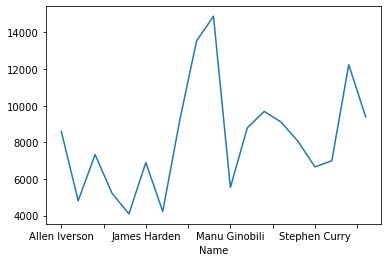

In [43]:
total_shots.plot()

In [97]:
total_shots2 = joint_data.groupby(['Name', 'Age_At_Game'])['Shot Made Flag'].sum()

In [98]:
total_shots2

Name           Age_At_Game
Allen Iverson  22              187
               23              462
               24              751
               25              844
               26             1005
                              ... 
Tony Parker    33              475
               34              326
               35              268
               36              258
               37               90
Name: Shot Made Flag, Length: 284, dtype: int64